In [1]:
!wget -q https://git.io/J0fjL -O IAM_Words.zip

!unzip -qq IAM_Words.zip

!mkdir data 
!mkdir data/words
!tar -xf IAM_Words/words.tgz -C data/words
!mv IAM_Words/words.txt data
     

In [4]:
from tensorflow.keras.layers import StringLookup
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

In [6]:
base_path = "/Users/poojithamm/Desktop/NEWS8/data"
words_list = []

words = open(f"{base_path}/words.txt", "r").readlines()
for line in words:
  if line[0] =="#":
    continue
  if line.split(" ")[1] != "err":
    words_list.append(line)

len(words_list)

np.random.shuffle(words_list)

In [7]:
print(words_list[0:10])

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure\n', 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he\n', 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during\n', 'm01-000-07-00 ok 196 339 1998 75 107 INO of\n', 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty\n', 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy\n', 'n03-082-04-03 ok 165 992 1414 118 135 NN boy\n', 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The\n', 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and\n', 'f04-024-01-06 ok 183 1104 981 60 70 IN in\n']


In [9]:
split_idx = int(0.9*len(words_list))
train_samples = words_list[:split_idx]
test_samples = words_list[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert len(words_list) == len(train_samples) + len(validation_samples) + len(test_samples)

print(f"Total Training Samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")


Total Training Samples: 86810
Total validation samples: 4823
Total test samples: 4823


In [10]:
base_image_path = os.path.join(base_path, "words")
print(base_path)
def get_image_paths_and_labels(samples):
  paths = []
  corrected_samples = []
  for (i, file_line) in enumerate(samples):
    line_split = file_line.strip()
    line_split = line_split.split(" ")
    image_name = line_split[0]
    partI = image_name.split("-")[0]
    partII = image_name.split("-")[1]
    img_path = os.path.join(
        base_image_path, partI, partI + "-" + partII, image_name + ".png"
    )
    if os.path.getsize(img_path):
      paths.append(img_path)
      corrected_samples.append(file_line.split("\n")[0])

  return paths, corrected_samples

train_img_paths, train_labels = get_image_paths_and_labels(train_samples)
validation_img_paths, validation_labels = get_image_paths_and_labels(validation_samples)
test_img_paths, test_labels = get_image_paths_and_labels(test_samples)


/Users/poojithamm/Desktop/NEWS8/data


In [11]:
base_image_path = os.path.join(base_path, "/Users/poojithamm/Desktop/NEWS8/test_images")
print(base_image_path)

t_images = []
from os import listdir
from os.path import isfile, join

# onlyfiles = [f for f in listdir(base_image_path) if isfile(join(base_image_path, f))]
for f in listdir(base_image_path):
  t_images_path = os.path.join(base_image_path, f)
  t_images.append(t_images_path)

print(t_images)
     

/Users/poojithamm/Desktop/NEWS8/test_images
['/Users/poojithamm/Desktop/NEWS8/test_images/line4word3.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word3.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word2.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word2.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word0.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word0.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word1.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word1.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line9word10.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word5.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word5.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word4.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word4.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line4word6.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line5word6.jpg', '/Users/poojithamm/Deskt

In [12]:
t_images[0:10]

['/Users/poojithamm/Desktop/NEWS8/test_images/line4word3.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line5word3.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line5word2.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line4word2.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line5word0.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line4word0.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line4word1.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line5word1.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line9word10.jpg',
 '/Users/poojithamm/Desktop/NEWS8/test_images/line5word5.jpg']

In [13]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

# alist=[
#     "something1",
#     "something12",
#     "something17",
#     "something2",
#     "something25",
#     "something29"]

t_images.sort(key=natural_keys)
print(t_images)
     

['/Users/poojithamm/Desktop/NEWS8/test_images/line0word0.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line0word1.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line0word2.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line0word3.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line0word4.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word0.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word1.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word2.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word3.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word4.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word5.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word6.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line1word7.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line2word0.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line2word1.jpg', '/Users/poojithamm/Desktop/NEWS8/test_images/line2word2.jpg', '/Users

In [14]:
train_img_paths[0:10]

['/Users/poojithamm/Desktop/NEWS8/data/words/e04/e04-030/e04-030-04-08.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/k02/k02-102/k02-102-05-03.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/a01/a01-082u/a01-082u-01-04.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/m01/m01-000/m01-000-07-00.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/g01/g01-031/g01-031-07-06.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/f07/f07-081b/f07-081b-01-06.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/n03/n03-082/n03-082-04-03.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/g06/g06-018c/g06-018c-04-05.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/g06/g06-011j/g06-011j-06-06.png',
 '/Users/poojithamm/Desktop/NEWS8/data/words/f04/f04-024/f04-024-01-06.png']

In [15]:
train_labels[0: 10]

['e04-030-04-08 ok 170 1489 1499 120 39 JJ sure',
 'k02-102-05-03 ok 182 836 1623 69 52 PP3A he',
 'a01-082u-01-04 ok 172 1582 1043 234 88 IN during',
 'm01-000-07-00 ok 196 339 1998 75 107 INO of',
 'g01-031-07-06 ok 152 1912 2038 167 59 NN booty',
 'f07-081b-01-06 ok 168 1366 924 350 88 NN gastronomy',
 'n03-082-04-03 ok 165 992 1414 118 135 NN boy',
 'g06-018c-04-05 ok 182 1298 1438 96 58 ATI The',
 'g06-011j-06-06 ok 182 1222 1785 146 95 CC and',
 'f04-024-01-06 ok 183 1104 981 60 70 IN in']

In [16]:
train_labels_cleaned = []
characters = set()
max_len = 0

for label in train_labels:
  label = label.split(" ")[-1].strip()
  for char in label:
    characters.add(char)

  max_len = max(max_len, len(label))
  train_labels_cleaned.append(label)

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples
train_labels_cleaned[:10]
     

Maximum length:  21
Vocab size:  78


['sure',
 'he',
 'during',
 'of',
 'booty',
 'gastronomy',
 'boy',
 'The',
 'and',
 'in']

In [17]:
def clean_labels(labels):
  cleaned_labels = []
  for label in labels:
    label = label.split(" ")[-1].strip()
    cleaned_labels.append(label)
  return cleaned_labels

validation_labels_cleaned = clean_labels(validation_labels)
test_labels_cleaned = clean_labels(test_labels)

     

In [18]:
ff = list(characters)

In [21]:
import pickle
with open("/Users/poojithamm/Desktop/NEWS8/characters","wb") as fp:   #Pickling
    pickle.dump(ff, fp)
     

In [24]:
import pickle
with open("characters", "rb") as fp:   # Unpickling
    b = pickle.load(fp)
    print(b)

['d', '-', 'N', '6', 'b', '(', '#', ';', 'u', 'K', 'X', 'a', '2', 'g', '*', 'L', 'i', 'p', '?', 'o', 'v', 'Q', '"', 'm', 'W', 'e', 'n', ':', 'C', 'z', 'J', 'D', "'", '3', ',', 'Y', 'T', 'S', 'k', '8', 'M', 'A', 'Z', 'j', 'w', 'f', 't', '9', '.', 'F', 'c', 'x', 'O', 'U', 's', 'E', 'G', '1', '4', '&', '/', '7', 'y', 'r', '!', 'l', '0', 'B', '+', 'V', 'H', 'P', 'R', ')', 'h', '5', 'q', 'I']


In [25]:
AUTOTUNE = tf.data.AUTOTUNE

# Maping characaters to integers
char_to_num = StringLookup(vocabulary=b, mask_token=None)

#Maping integers back to original characters
num_to_chars = StringLookup(vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True)

     

In [26]:
def distortion_free_resize(image, img_size):
  w, h = img_size
  image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio=True)

  # Check tha amount of padding needed to be done.
  pad_height = h - tf.shape(image)[0]
  pad_width = w - tf.shape(image)[1]

  # only necessary if you want to do same amount of padding on both sides.
  if pad_height % 2 != 0:
    height = pad_height // 2
    pad_height_top = height +1
    pad_height_bottom = height
  else:
    pad_height_top = pad_height_bottom = pad_height // 2

  if pad_width % 2 != 0:
    width = pad_width // 2
    pad_width_left = width + 1
    pad_width_right = width
  else:
    pad_width_left = pad_width_right = pad_width // 2

  image = tf.pad(
      image, paddings=[
          [pad_height_top, pad_height_bottom],
          [pad_width_left, pad_width_right],
          [0, 0],
      ],
  )
  image = tf.transpose(image, perm=[1,0,2])
  image = tf.image.flip_left_right(image)
  return image

In [27]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def vectorize_label(label):
  label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  length = tf.shape(label)[0]
  pad_amount = max_len - length
  label = tf.pad(label, paddings=[[0, pad_amount]], constant_values=padding_token)
  return label

 
def process_images_labels(image_path, label):
  image = preprocess_image(image_path)
  label = vectorize_label(label)
  return {"image": image, "label": label}
  
def prepare_dataset(image_paths, labels):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
    process_images_labels, num_parallel_calls=AUTOTUNE
  )

  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


In [28]:
train_ds = prepare_dataset(train_img_paths, train_labels_cleaned)
validation_ds = prepare_dataset(validation_img_paths, validation_labels_cleaned)
test_ds = prepare_dataset(test_img_paths, test_labels_cleaned)


In [29]:
batch_size = 64
padding_token = 99
image_width = 128
image_height = 32

def preprocess_image(image_path, img_size=(image_width, image_height)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = distortion_free_resize(image, img_size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

def process_images_2(image_path):
  image = preprocess_image(image_path)
  # label = vectorize_label(label)
  return {"image": image}
  
def prepare_test_images(image_paths):
  dataset = tf.data.Dataset.from_tensor_slices((image_paths)).map(
    process_images_2, num_parallel_calls=AUTOTUNE
  )

  # return dataset
  return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)

inf_images = prepare_test_images(t_images)
     

In [60]:
n=1
for i in inf_images:
    if n==5:
        break
    else:
        print(i,i["image"])
    n+=1
    

{'image': <tf.Tensor: shape=(64, 128, 32, 1), dtype=float32, numpy=
array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.       

2025-03-01 19:57:16.650584: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [56]:
for batch in inf_images:
    print(batch["image"].shape)


(64, 128, 32, 1)
(18, 128, 32, 1)


2025-02-27 19:45:35.199100: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2025-02-25 22:04:30.401233: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


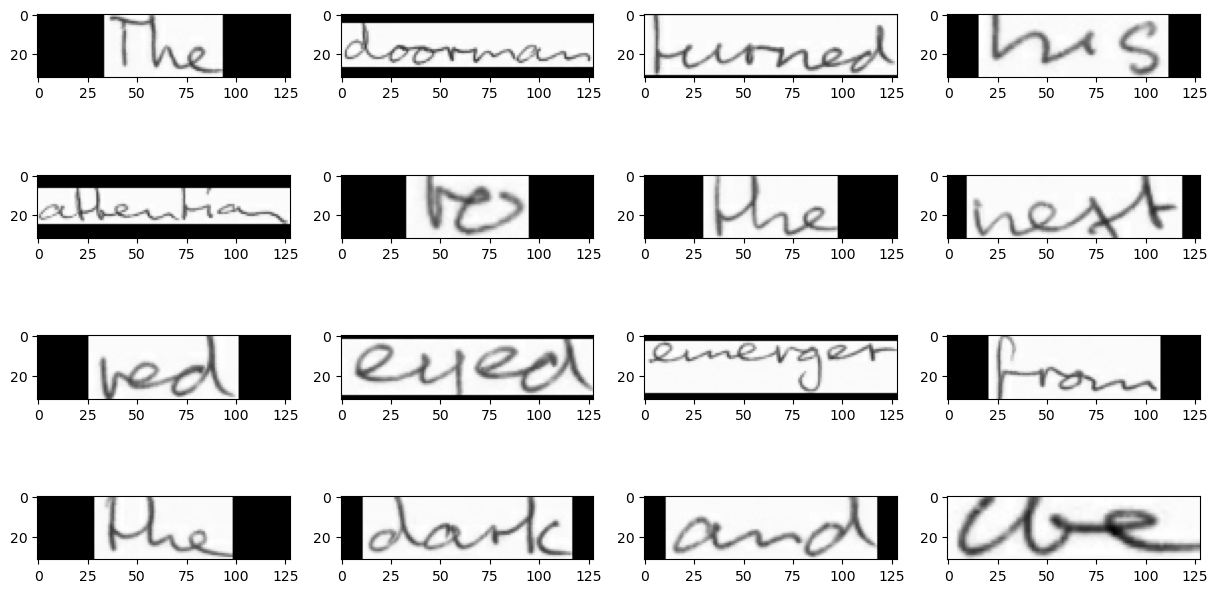

2025-02-25 22:04:31.146910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [30]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

for data in inf_images.take(1):
  images = data["image"]
  # imm = images.reshape(images.shape[0], (images.shape[1]*images.shape[2]))
  # imm = imm.transpose()
  # print(imm.shape)
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  # ss = plt.imshow(imm, cmap="gray")
  # plt.show()
  for i in range(16): 
    img = images[i]
    # print(img.shape)
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    # Gather indices where Label!= padding token

    ax[i // 4, i % 4].imshow(img, cmap="gray")
    

  plt.show()

2025-02-25 22:04:36.982773: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


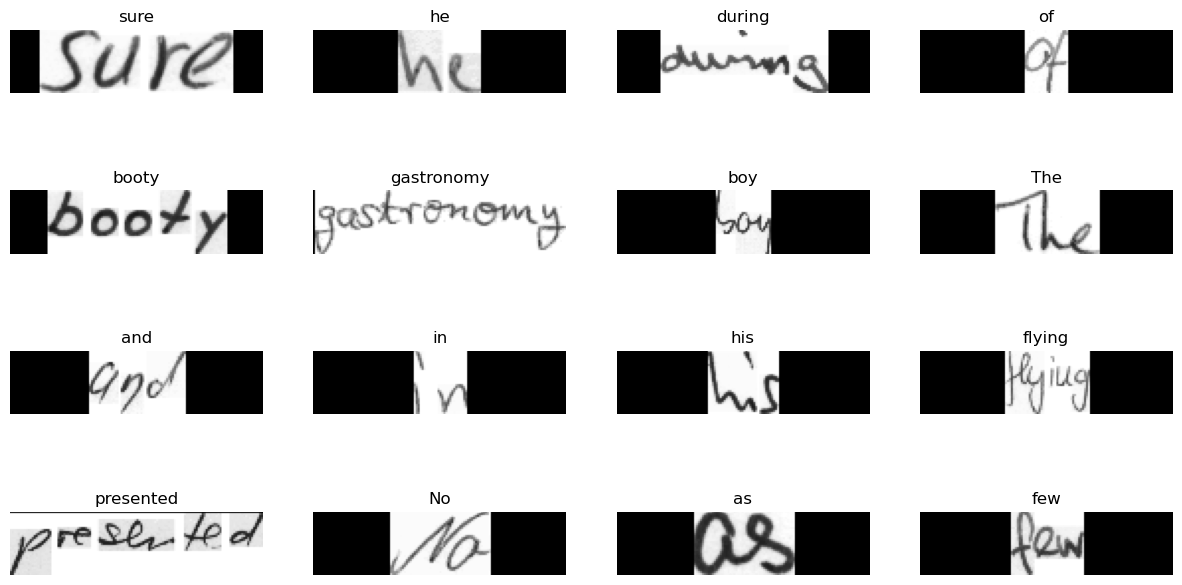

2025-02-25 22:04:37.230086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
for data in train_ds.take(1):
  images, labels = data["image"], data["label"]
  _, ax = plt.subplots(4, 4, figsize=(15, 8))

  for i in range(16): 
    img = images[i]
    # print(img.shape)
    img = tf.image.flip_left_right(img)
    img = tf.transpose(img, perm=[1, 0, 2])
    img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
    img = img[:, :, 0]

    # Gather indices where Label!= padding token
    label = labels[i]
    indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
    # Convert to string.
    label = tf.strings.reduce_join(num_to_chars(indices))
    label = label.numpy().decode("utf-8")

    ax[i // 4, i % 4].imshow(img, cmap="gray")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")

  plt.show()

In [32]:
class CTCLayer(keras.layers.Layer):

  def __init__(self, name=None,**kwargs):
    super().__init__(name=name,**kwargs)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss)

    # At test time, just return the computed predictions.
    return y_pred

def build_model():
  input_img = keras.Input(shape=(image_width, image_height, 1), name="image")
  labels = keras.layers.Input(name="label", shape=(None,))

  # first conv block
  x = keras.layers.Conv2D(
      32, (3,3), activation = "relu",
      kernel_initializer="he_normal",
      padding="same",
      name="Conv1"
  )(input_img)
  x = keras.layers.MaxPooling2D((2,2), name="pool1")(x)

  # Second conv block
  x = keras.layers.Conv2D(
      64, (3,3), activation = "relu", kernel_initializer="he_normal",
      padding="same",
      name="Conv2"
  )(x)
  x = keras.layers.MaxPooling2D((2,2), name="pool2")(x)

  # We have two maxpool layers with pool size and strides 2
  # Hence downsampled feature maps are 4x smaller the number of filters in the last layer is 64, 
  # Reshape accordingly before passing the output to the RNN part of the model.
  
  new_shape = ((image_width // 4), (image_height // 4) * 64)
  x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
  x = keras.layers.Dense(64, activation="relu", name="dense1")(x)
  x = keras.layers.Dropout(0.2)(x)

  # RNN
  x = keras.layers.Bidirectional(
      keras.layers.LSTM(128, return_sequences=True, dropout=0.25)
  )(x)
  x = keras.layers.Bidirectional(
    keras.layers.LSTM(64, return_sequences=True, dropout=0.25)
  )(x)
  # +2 is to account for the two special tokens introduced by the CTC loss.
  # The recommendation comes here: https://git.10/J0eXP.
  x = keras.layers.Dense(
    len(char_to_num.get_vocabulary()) + 2, activation="softmax", name="dense2"
  )(x)
   # Add CTC layer for calculating CTC Loss at each step.
  output = CTCLayer(name="ctc_loss")(labels, x)

  # Define the model.
  model = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name="handwriting_recognizer"
  )
  
  # optimizer
  opt = keras.optimizers.Adam()
  # Compile the model and return
  model.compile(optimizer=opt)
  return model

# Get the model
model = build_model()
model.summary()

Model: "handwriting_recognizer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 128, 32,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 128, 32,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 64, 16,    │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 64, 16,    │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 32, 8, 64) │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 32, 512)   │          0 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 32, 64)    │     32,832 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 32, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 32, 256)   │    197,632 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 32, 128)   │    164,352 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 32, 81)    │     10,449 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 32, 81)    │          0 │ label[0][0],      │
│                     │                   │            │ dense2[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 424,081 (1.62 MB)

 Trainable params: 424,081 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
validation_images = []
validation_labels = []

for batch in validation_ds:
  validation_images.append(batch["image"])
  validation_labels.append(batch["label"])



2025-02-25 22:05:47.714102: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
def calculate_edit_distance(labels, predictions):
  # Get a single batch and convert its labels to sparse tensors.
  sparse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

  # Make predictions and convert them to sparse tensors.
  input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
  predictions_decoded = keras.backend.ctc_decode(
    predictions, input_length=input_len, greedy=True
  )[0][0][:, :max_len]
  sparse_predictions = tf.cast(
    tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
  )

  # Compute individual edit distances and average them out.
  edit_distances = tf.edit_distance(
    sparse_predictions, sparse_labels, normalize=False
  )
  return tf.reduce_mean(edit_distances)

class EditDistanceCallback(keras.callbacks.Callback):
  def __init__(self, pred_model):
    super().__init__()
    self.prediction_model = pred_model
  def on_epoch_end(self, epoch, logs = None):
    edit_distances = []

    for i in range(len(validation_images)):
      labels = validation_labels[i]
      predictions = self.prediction_model.predict(validation_images[i])
      edit_distances.append(calculate_edit_distance(labels, predictions).numpy())
    print(f"Mean eidt distance for each {epoch + 1}: {np.mean(edit_distances): .4f}")
 

     


In [37]:
epochs = 50 # To get good results this should be at least 50.

model = build_model()
prediction_model = keras.models.Model(
  model.input[0], model.get_layer(name="dense2").output
)
edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs,
  callbacks=[edit_distance_callback],
)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step tep - loss: 1080.62
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━

In [41]:
# Saving thje model

model.save_weights('ocr_model_v4.weights.h5')
prediction_model.save_weights('ocr_model_v5.weights.h5')

model.save("ocr_model_v8.h5")
prediction_model.save("ocr_model_50_epoch.h5")
     

(64, 128, 32, 1)


2025-02-26 08:15:52.463520: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


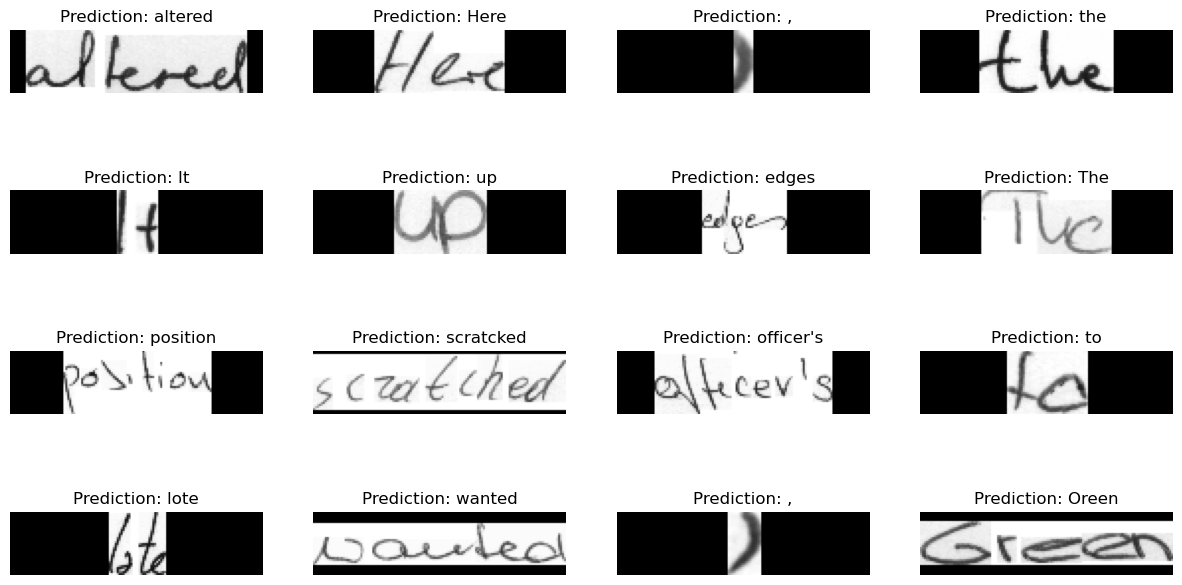

2025-02-26 08:15:53.819632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    # Iterate over the results and get back the text.
    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


# Let's check results on sone test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    print(batch_images.shape)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()


In [43]:
custom_objects = {"CTCLayer": CTCLayer}

In [44]:
reconstructed_model = keras.models.load_model("/Users/poojithamm/Desktop/NEWS8/ocr_model_50_epoch.h5", custom_objects=custom_objects)
     

In [46]:
prediction_model = keras.models.Model(
  reconstructed_model.input[0], reconstructed_model.get_layer(name="dense2").output
)

(64, 128, 32, 1)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 


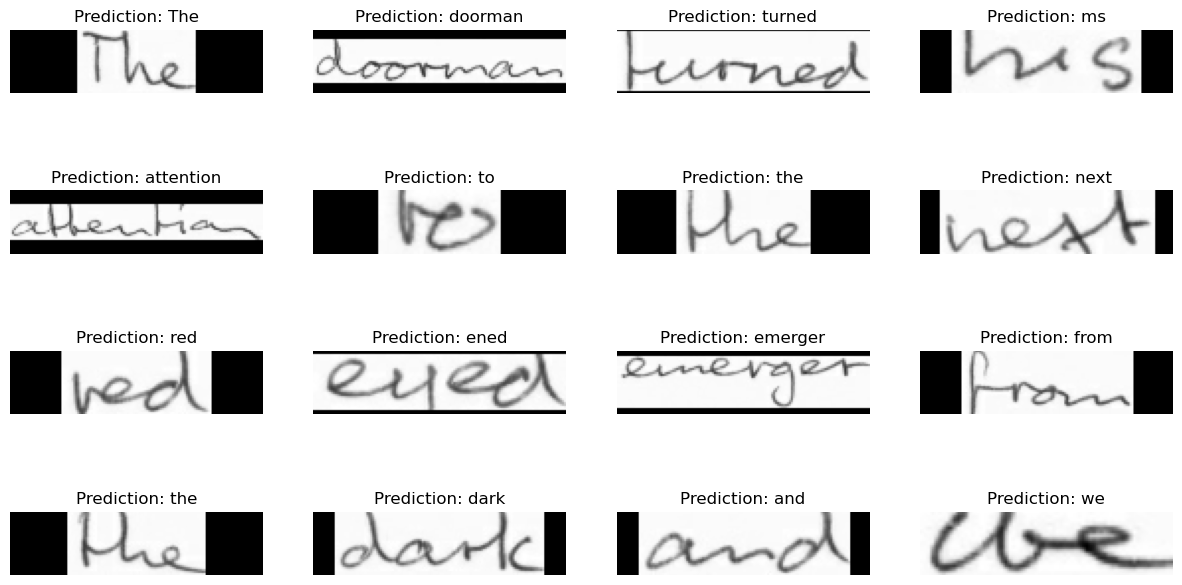

(18, 128, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


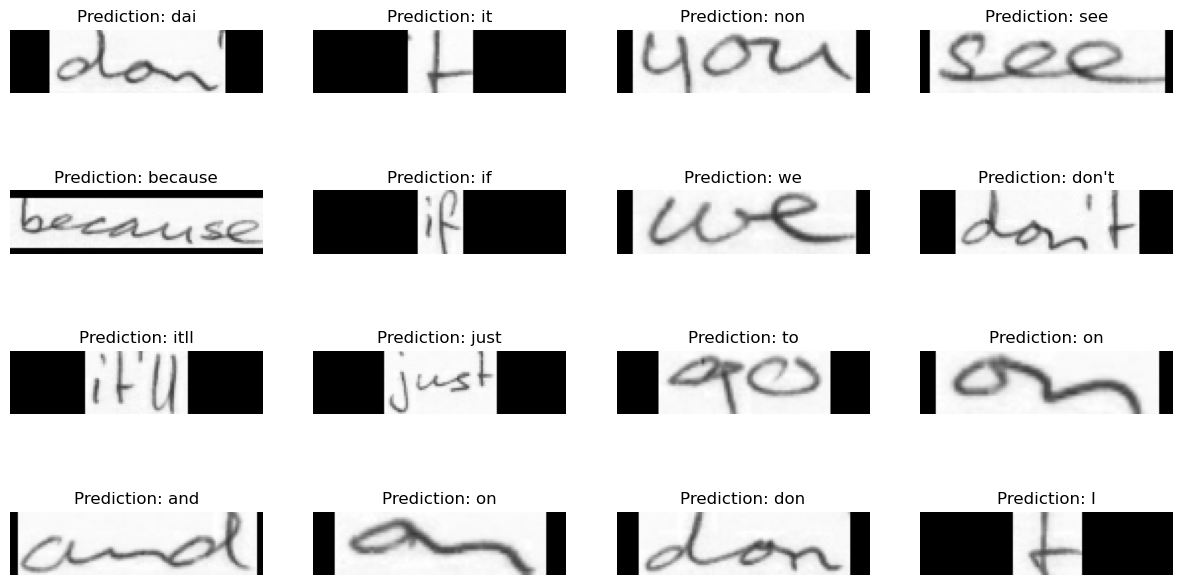

2025-02-26 08:16:47.709437: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [47]:
pred_test_text = []

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_len
    ]

    # Iterate over the results and get back the text.
    output_text = []

    for res in results:
      res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
      res = tf.strings.reduce_join(num_to_chars(res)).numpy().decode("utf-8")
      output_text.append(res)

    return output_text


# Let's check results on sone test samples.
for batch in inf_images.take(3):
    batch_images = batch["image"]
    # batch_images= tf.expand_dims(batch_images, axis=0)
    print(batch_images.shape)
    # print(batch_images.shape)

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)
    pred_test_text.append(pred_texts)

    for i in range(16):
      img = batch_images[i]
      img = tf.image.flip_left_right(img)
      img = tf.transpose(img, perm=[1, 0, 2])
      img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
      img = img[:, :, 0]

      title = f"Prediction: {pred_texts[i]}"
      ax[i // 4, i % 4].imshow(img, cmap = "gray")
      ax[i // 4, i % 4].set_title(title)
      ax[i // 4, i % 4].axis("off")

    plt.show()


In [48]:
flat_list = [item for sublist in pred_test_text for item in sublist]
print(flat_list)

['The', 'doorman', 'turned', 'ms', 'attention', 'to', 'the', 'next', 'red', 'ened', 'emerger', 'from', 'the', 'dark', 'and', 'we', 'went', 'on', 'tosether', 'to', 'the', 'station', 'the', 'children', 'silent', 'because', 'of', 'the', 'cruelty', 'of', 'the', 'world', 'Finally', 'Catherine', 'sad', 'her', 'eyes', 'wet', 'agan', 'think', 'its', 'all', 'absdutely', 'beasthy.', 'and', 'I', 'can', 'It', 'bear', 'tothink', 'about', 'it', 'And', 'B1', 'hilip', 'sand', 'But', 'we', 'we', 'aot', 'to', 'think', 'about', 'it', 'dai', 'it', 'non', 'see', 'because', 'if', 'we', "don't", 'itll', 'just', 'to', 'on', 'and', 'on', 'don', 'I', 'non', 'see']


In [49]:
sentence = ' '.join(flat_list)
print(sentence)

The doorman turned ms attention to the next red ened emerger from the dark and we went on tosether to the station the children silent because of the cruelty of the world Finally Catherine sad her eyes wet agan think its all absdutely beasthy. and I can It bear tothink about it And B1 hilip sand But we we aot to think about it dai it non see because if we don't itll just to on and on don I non see


In [53]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))


happening
{'apennine', 'penning', 'japanning', 'happening'}


In [54]:
words = sentence.split()

# Find misspelled words
misspelled = spell.unknown(words)

# Create a list to hold corrected words
corrected_words = []
for word in words:
    # If the word is considered misspelled, get its correction
    if word in misspelled:
        corrected_word = spell.correction(word)
        corrected_words.append(corrected_word)
    else:
        corrected_words.append(word)

# Rebuild the sentence from the corrected words
corrected_sentence = ' '.join(corrected_words)
print("Corrected Sentence:")
print(corrected_sentence)

Corrected Sentence:
The doorman turned ms attention to the next red need emerge from the dark and we went on together to the station the children silent because of the cruelty of the world Finally Catherine sad her eyes wet again think its all absolutely beastly and I can It bear think about it And B1 philip sand But we we not to think about it day it non see because if we don't i'll just to on and on don I non see
